# for Fig 1

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
%matplotlib inline
import csv

import scipy.optimize as op
import scipy.stats
from scipy.optimize import curve_fit
import scipy.io
from scipy.stats import rice

import random
import pickle
import seaborn as sns

import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats, wilcoxon,ttest_rel, pearsonr,shapiro,f_oneway, ranksums
from scipy.special import stdtr
import csv
import pandas as pd

from scipy.integrate import quad
import sys 
import os
#sys.path.append(os.path.abspath("/Users/miraliu/Desktop/PostDocCode/PartialNephrectomy_Python"))
#sys.path.append(os.path.abspath("/Users/miraliu/Desktop/PostDocCode/RenalAllograft_Python"))

#from ML_UsefulFunctions import *
#from KidneyROIAnalyses import *
#from RenalAllograftFunctions import *
#from DataLeakageCorrections import *

from scipy import special

from scipy.integrate import tplquad

pd.options.display.float_format = '{:.3f}'.format

from scipy.stats import f_oneway

from collections import Counter
from sklearn.feature_selection import SequentialFeatureSelector

pl.rcParams["font.family"] = "Times New Roman"


import warnings
warnings.simplefilter("ignore")

In [2]:
#with a known D, t, and a, calculate integral. 

#this is the gaussian integral with sigma = sqrt(4Dt)
def integrand(x,D,t):
    sigma = np.sqrt(2*D*t)
    return (1./(sigma*np.sqrt(2*np.pi))) * np.exp(-np.power(x/sigma, 2.)/2) 

def integrand_3D(r,phi,theta,sigma):
    return r**2 * np.sin(theta) * (1./(np.power(sigma*np.sqrt(2*np.pi),3))) * np.exp(-np.power(r/sigma, 2.)/2) 
    
    
def integrand_3D_anomalous(r,phi,theta,sigma, nu):
    alpha=1/(1-nu)
    return r**2 * np.sin(theta) * (1./(np.power(sigma*np.sqrt(2*np.pi),3))) * np.exp(-np.power(r/sigma, alpha)/2) 
    
# this integrates a 3D gaussian integral with radius a
def integrate_3Dsphere(a,D,t):
    sigma = np.sqrt(2*D*t)
    integral = tplquad(integrand_3D, 
                       0, np.pi, 0,2*np.pi, 0, a, args=(sigma,))
    return integral[0]

# this integrates a 3D gaussian integral with radius a
def integrate_3Dsphere_anomalous(a,D,t,gamma):
    nu=gamma/2
    sigma = np.sqrt(2*D*(t**gamma))
    integral = tplquad(integrand_3D_anomalous, 
                       0, np.pi, 0,2*np.pi, 0, a, args=(sigma,nu))
    return integral[0]

def find_nearest_time(t, y, value):
    array = np.asarray(y)
    idx = (np.abs(array - value)).argmin()
    return t[idx]

def RiemannSum(x,y):
    n = len(x) #number of sums
    summed = 0
    for i in range(1,n):
        Sum_y = (y[i-1] + y[i])/2
        Deltax = x[i] - x[i-1]
        summed = summed + (Sum_y*Deltax)
    return summed

In [3]:
# for prettier plot:
conc1= []
time1 = np.linspace(1,60,25)
for t in time1:
    with sns.color_palette('viridis',25): 
        a = .5
        D = .009
        conc_t = integrate_3Dsphere(a,D,t)
        conc1 = np.append(conc1,conc_t)
        #pl.scatter(t,conc_t)
        
def get_sphere_points(r,n):
    x = np.random.normal(0,r,n)
    y = np.random.normal(0,r,n)
    z = np.random.normal(0,r,n)
    xp,yp,zp = [],[],[]
    for k in range(n): 
        if x[k]**2 + y[k]**2 + z[k]**2 <= r**2:
            xp.append(x[k])
            yp.append(y[k])
            zp.append(z[k])
    return xp,yp,zp
            
        
    


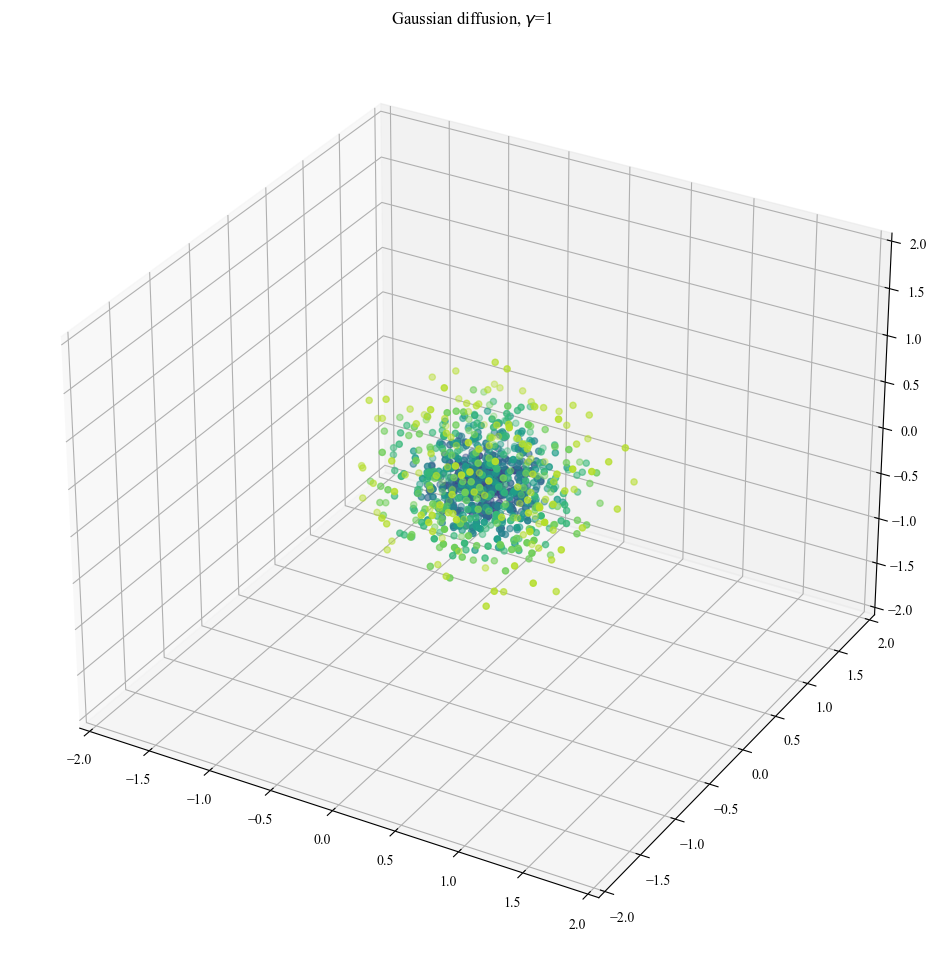

In [4]:
from mpl_toolkits import mplot3d
fig = pl.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
times_wanted = [1,5,10,14,19,28,40,60]
D = .01

#cmap = ListedColormap(sns.color_palette('viridis',50).as_hex())
for i in range(8):
    t = times_wanted[i]
    sigma = np.sqrt(2*D*t)
    xp,yp,zp = get_sphere_points(sigma,700)
    ax.scatter(xp,yp,zp, c = sns.color_palette('viridis',8).as_hex()[i])


#pl.title('3D Gaussian Distribution Over Time')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_zlim(-2,2)

# remove axis and grid lines
#ax.grid(False)
#pl.axis('off')
#pl.savefig('/Users/neuroimaging/Desktop/Dissertation/Figures/3D_GaussianDist.png',dpi = 100)
pl.title('Gaussian diffusion, $\gamma$=1')

pl.show()

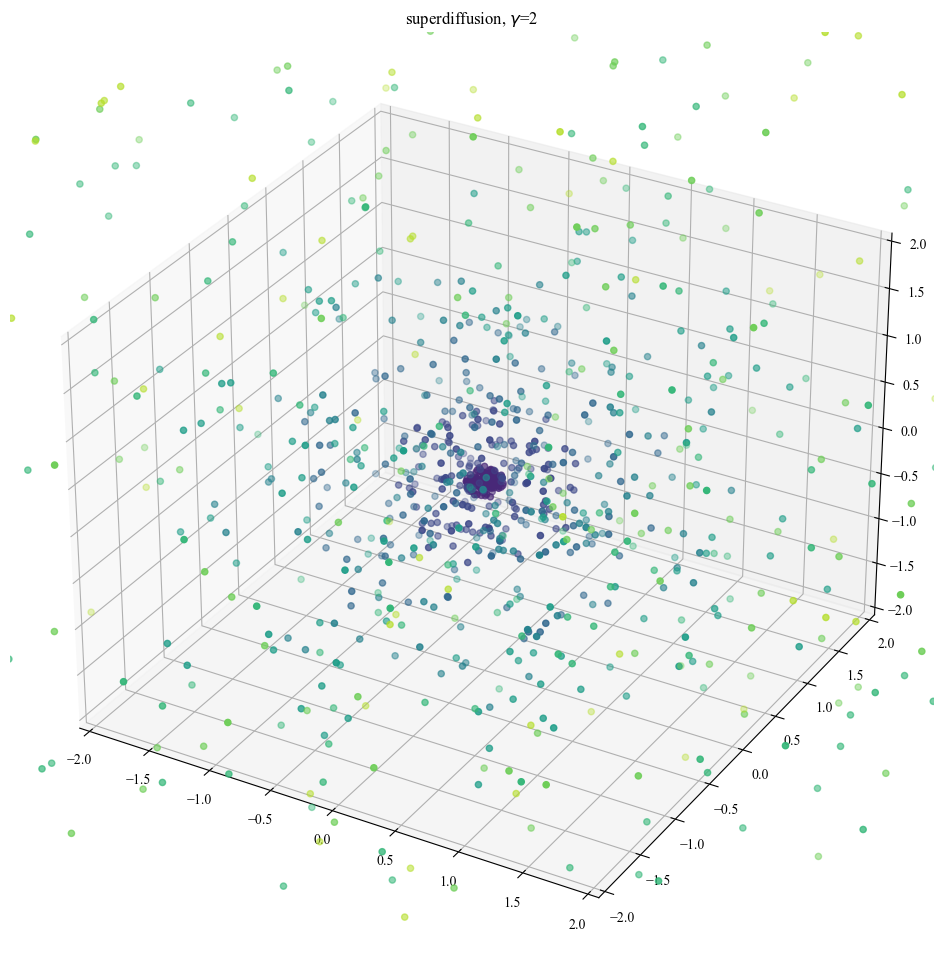

In [5]:
# anomalous isotropic diffusion
from mpl_toolkits import mplot3d
fig = pl.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
times_wanted = [1,5,10,14,19,28,40,60]
D = .01

#cmap = ListedColormap(sns.color_palette('viridis',50).as_hex())
for i in range(8):
    t = times_wanted[i]
    sigma = np.sqrt(2*D*(t**2))
    xp,yp,zp = get_sphere_points(sigma,700)
    ax.scatter(xp,yp,zp, c = sns.color_palette('viridis',8).as_hex()[i])


#pl.title('3D Gaussian Distribution Over Time')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_zlim(-2,2)

# remove axis and grid lines
#ax.grid(False)
#pl.axis('off')
#pl.savefig('/Users/neuroimaging/Desktop/Dissertation/Figures/3D_GaussianDist.png',dpi = 100)
pl.title('superdiffusion, $\gamma$=2')
pl.show()

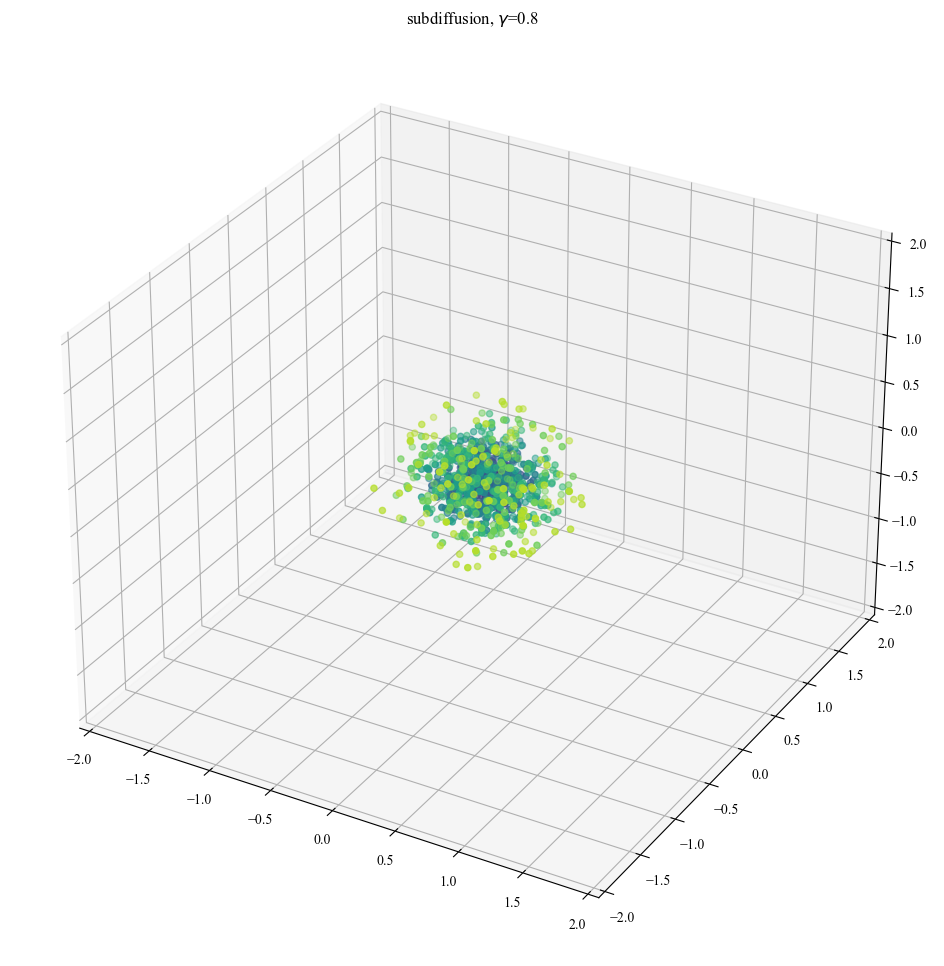

In [6]:
# anomalous isotropic diffusion
from mpl_toolkits import mplot3d
fig = pl.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
times_wanted = [1,5,10,14,19,28,40,60]
D = .01

#conc= []
#cmap = ListedColormap(sns.color_palette('viridis',50).as_hex())
for i in range(8):
    t = times_wanted[i]
    sigma = np.sqrt(2*D*(t**0.85))
    xp,yp,zp = get_sphere_points(sigma,700)
    ax.scatter(xp,yp,zp, c = sns.color_palette('viridis',8).as_hex()[i])
    
    #calculate concentration (number of dots within a 0.5r sphere)
    #conc= np.append(conc,sigma)


#pl.title('3D Gaussian Distribution Over Time')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_zlim(-2,2)

# remove axis and grid lines
#ax.grid(False)
#pl.axis('off')
#pl.savefig('/Users/neuroimaging/Desktop/Dissertation/Figures/3D_GaussianDist.png',dpi = 100)
pl.title('subdiffusion, $\gamma$=0.8')
pl.show()

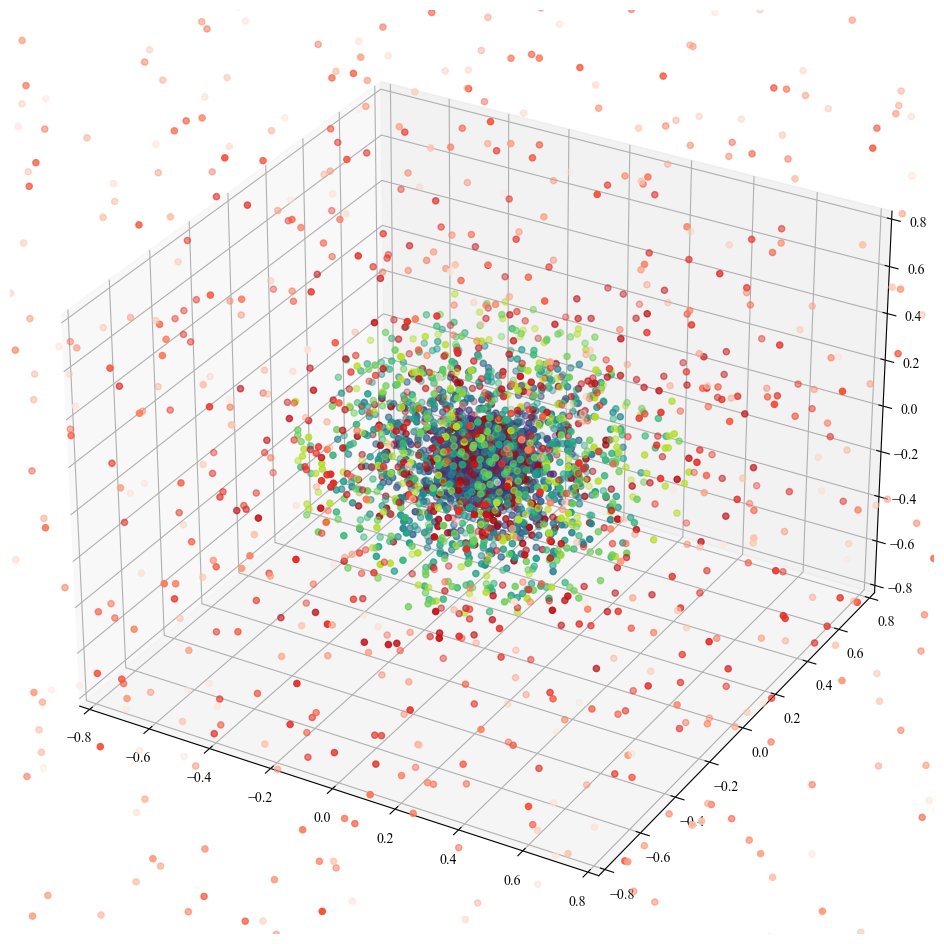

In [7]:
from mpl_toolkits import mplot3d
fig = pl.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
times_wanted = [1,2,3,5,6,7,8,9,10,14,16,19,24,28,40,60,80, 90, 100]
Dtissue = .002 #tissue
Dtubule = .0200 #tubules
Dvasc = .0800 #vascular

ftissue = .6
ftubule = .3
fvasc= .1
#cmap = ListedColormap(sns.color_palette('viridis',50).as_hex())
for i in range(8):
    t = times_wanted[i]

    sigma = np.sqrt(2*Dvasc*t**2)
    xp,yp,zp = get_sphere_points(sigma,int(1000))
    ax.scatter(xp,yp,zp, c = sns.color_palette('Reds_r',8).as_hex()[i])
    
 
    sigma = np.sqrt(2*Dtubule*t)
    xp,yp,zp = get_sphere_points(sigma,int(1000))
    ax.scatter(xp,yp,zp, c = sns.color_palette('viridis',8).as_hex()[i])
    
    
    sigma = np.sqrt(2*Dtissue*t**0.85)
    xp,yp,zp = get_sphere_points(sigma,int(1000))
    ax.scatter(xp,yp,zp, c = sns.color_palette('Greys_d',8).as_hex()[i])


#pl.title('3D Gaussian Distribution Over Time')
ax.set_xlim(-.8,.8)
ax.set_ylim(-.8,.8)
ax.set_zlim(-.8,.8)

# remove axis and grid lines
#ax.grid(False)
#pl.axis('off')
#pl.savefig('/Users/neuroimaging/Desktop/Dissertation/Figures/3D_GaussianDist.png',dpi = 100)
pl.show()

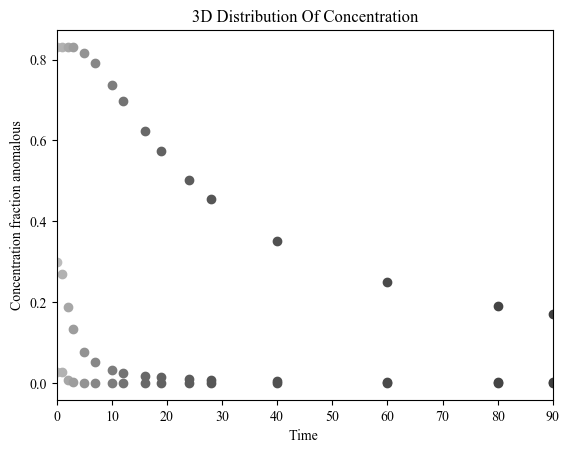

In [8]:
# plot of concentration within a voxel of size 1 
# this shows the fraction of signal remaining in the voxel
conc= []
conc= []
conc= []
#time = np.linspace(1,60,25)
time = [0.1,1,2,3,5,6,7,8,9,10,14,16,19,24,28,40,60,80, 90, 100]
time = [.1,1,2,3,5,7,10, 12,16,19,24,28,40,60,80, 90, 100]

for t in time:
    with sns.color_palette('Greys_d',len(time)): 
        r = .5
        conc_t = integrate_3Dsphere_anomalous(r,Dtissue,t,0.85)
        conc = np.append(conc,conc_t)
        pl.scatter(t,conc_t*ftissue)
        
for t in time:
    with sns.color_palette('viridis',len(time)): 
        r = .5
        conc_t = integrate_3Dsphere_anomalous(r,Dtubule,t,1)
        conc = np.append(conc,conc_t)
        pl.scatter(t,conc_t*ftubule)
        
for t in time:
    with sns.color_palette('Reds_r',len(time)): 
        r = .5
        conc_t = integrate_3Dsphere_anomalous(r,Dvasc,t,1.99)
        conc = np.append(conc,conc_t)
        pl.scatter(t,conc_t*fvasc)
        
pl.xlim(0,90)
#pl.ylim(0,1.05)
pl.ylabel('Concentration fraction anomalous')
pl.xlabel('Time ')
#pl.legend(bbox_to_anchor=(1.3,1.03))
pl.title('3D Distribution Of Concentration')
pl.show()

# note: dont know the correct normalization factor... so am just normalizing to the known value at t=0 which is the fraction! 

In [9]:
# plot of concentration within a voxel of size 1 
# this shows the fraction of signal remaining in the voxel
conc= []
conc_tisss= []
conc_tubs= []
conc_vascs= []

concA=[]
conc_tisssA= []
conc_tubsA= []
conc_vascsA= []
time = np.linspace(0.1,100,100)
#time = [.1,1,2,3,5,7,10, 12,16,19,24,28,40,60,80, 90, 100]

for t in time: 
    r = .5
    #integrate_3Dsphere(r, D_type, t). Change anomalous nature by relationship with time (t**gamma)?

    ## gaussian
    conc_tiss = integrate_3Dsphere(r,0.002,t) #Dtissue = 0.002
    conc_tub = integrate_3Dsphere(r,0.02,t) #Dtubule = 0.02
    conc_vasc = integrate_3Dsphere(r,0.08,t) # D vasc = 0.08
    conc = np.append(conc,conc_tiss*0.6+conc_tub*0.3 + conc_vasc*0.1) #ftissue=0.6, ftubule=0.3, fvasc=0.1
    conc_tisss = np.append(conc_tisss, conc_tiss)
    conc_tubs = np.append(conc_tubs,conc_tub)
    conc_vascs = np.append(conc_vascs, conc_vasc)
    
    ## anomalous
    conc_tiss_a = integrate_3Dsphere_anomalous(r,0.002,t,0.85) #DAtissue=0.002
    conc_tub_a = integrate_3Dsphere_anomalous(r,0.027,t,1) #DAtubule=0.027
    conc_vasc_a = integrate_3Dsphere_anomalous(r,0.10,t,1.99) #DAvasc = 0.10
    concA = np.append(concA,conc_tiss*0.69+conc_tub*0.26 + conc_vasc*0.05) #fAtissue=0.69, fAtubule=0.26, fAvasc=0.05
    conc_tisssA = np.append(conc_tisssA, conc_tiss_a)
    conc_tubsA = np.append(conc_tubsA,conc_tub_a)
    conc_vascsA = np.append(conc_vascsA, conc_vasc_a)

# normalize concentrations for anomalous diffusion... 
concA=concA/concA[0]
conc_tisssA=conc_tisssA/conc_tisssA[0]
conc_tubsA = conc_tubsA/conc_tubsA[0]
conc_vascsA= conc_vascsA/conc_vascsA[0]


# get the median time

In [10]:
print('Gaussian tissue MTT: ', find_nearest_time(time,conc_tisss*0.6,0.3))
print('Gaussian tubule MTT: ', find_nearest_time(time,conc_tubs*0.3,0.15))
print('Gaussian vasc MTT: ', find_nearest_time(time,conc_vasc*0.1,0.05))
print('Gaussian all MTT: ', find_nearest_time(time,conc/conc[0],0.5))

print('\nanomalous tissue MTT: ', find_nearest_time(time,conc_tisssA*0.69,0.69/2))
print('anomalous tubule MTT: ', find_nearest_time(time,conc_tubsA*0.26,0.26/2))
print('anomalous vasc MTT: ', find_nearest_time(time,conc_vascsA*0.05, 0.05/2))
print('anomalous all MTT: ', find_nearest_time(time,concA,0.5))

Gaussian tissue MTT:  26.336363636363636
Gaussian tubule MTT:  3.1272727272727274
Gaussian vasc MTT:  0.1
Gaussian all MTT:  13.218181818181817

anomalous tissue MTT:  32.39090909090909
anomalous tubule MTT:  2.118181818181818
anomalous vasc MTT:  2.118181818181818
anomalous all MTT:  17.254545454545454


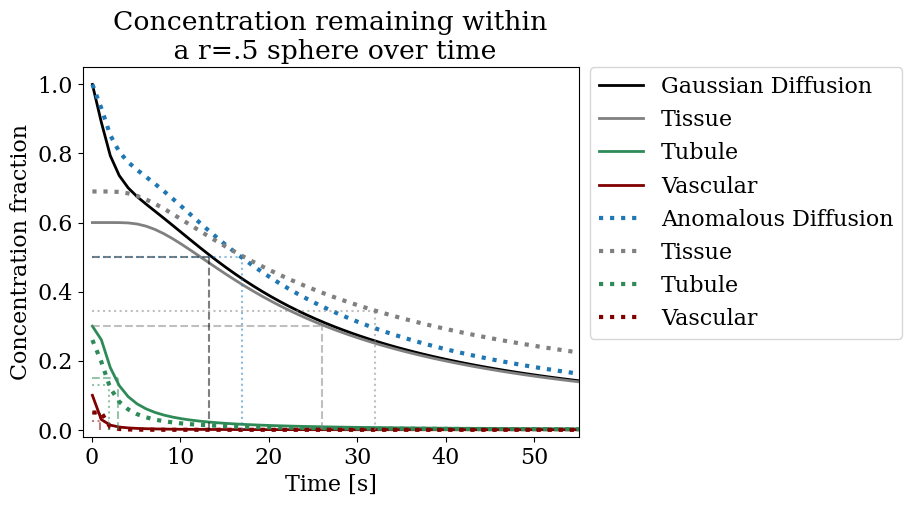

In [16]:
   
matplotlib.rcParams.update({'font.size': 16})
pl.rcParams["font.family"] = "serif"
pl.rcParams["mathtext.fontset"] = "dejavuserif"


#Gaussian plot
#pl.scatter(time,conc,color = 'black')
pl.plot(time,conc, color = 'black', label = 'Gaussian Diffusion',linewidth=2)
#pl.scatter(time,conc_tisss*0.6,color = 'grey')
pl.plot(time,conc_tisss*0.6, color = 'grey', label = 'Tissue',linewidth=2)
#pl.scatter(time,conc_tubs*0.3,color = 'seagreen')
pl.plot(time,conc_tubs*0.3, color = 'seagreen', label = 'Tubule',linewidth=2)
#pl.scatter(time,conc_vascs*0.1,color = 'maroon')
pl.plot(time,conc_vascs*0.1, color = 'maroon', label= 'Vascular',linewidth=2)


#Anomalous plot
pl.plot(time,concA,color = '#1f77b4', label = 'Anomalous Diffusion',linestyle=':',linewidth=3)
pl.plot(time,conc_tisssA*0.69, color = 'grey',label = 'Tissue', linestyle=':',linewidth=3)
pl.plot(time,conc_tubsA*0.26, color = 'seagreen', label = 'Tubule',linestyle=':',linewidth=3)
pl.plot(time,conc_vascsA*0.05, color = 'maroon',label = 'Vascular',linestyle=':',linewidth=3)


pl.xlim(-1,55)
pl.ylim(-0.02,1.05)
pl.ylabel('Concentration fraction')
pl.xlabel('Time [s]')
#pl.legend(bbox_to_anchor=(1.3,1.03))
pl.title('Concentration remaining within\n a r=.5 sphere over time')


## trying to put the little markers in... 
# for Gaussian
pl.hlines(.3, 0,26,color = 'grey',alpha=0.5,linestyle='--')#, alpha=.5)
pl.hlines(.15, 0,3,color = 'seagreen',alpha=0.5,linestyle='--')#,alpha=.5)
pl.hlines(.05,0,1,color = 'maroon',alpha=0.5,linestyle='--')#,alpha=.5)
pl.hlines(.5,0,13.3,color = 'black',alpha=0.5,linestyle='--')

pl.vlines(1,0,.05,color='maroon',alpha=0.5,linestyle='--')
pl.vlines(3,0,.15,color='seagreen',alpha=0.5,linestyle='--')
pl.vlines(26,0,.3,color='grey',alpha=0.5,linestyle='--')
pl.vlines(13.3,0,.5,color='black',alpha=0.5,linestyle='--')

# for anomalous
pl.hlines(.69/2, 0,32,color = 'grey',alpha=0.5,linestyle=':')#, alpha=.5)
pl.hlines(.26/2, 0,2,color = 'seagreen',alpha=0.5,linestyle=':')#,alpha=.5)
pl.hlines(.05/2,0,2,color = 'maroon',alpha=0.5,linestyle=':')#,alpha=.5)
pl.hlines(.5,0,17,color = '#1f77b4',alpha=0.5,linestyle=':')

pl.vlines(2,0,.05/2,color='maroon',alpha=0.5,linestyle=':')
pl.vlines(2,0,.26/2,color='seagreen',alpha=0.5,linestyle=':')
pl.vlines(32,0,0.69/2,color='grey',alpha=0.5,linestyle=':')
pl.vlines(17,0,0.5,color='#1f77b4',alpha=0.5,linestyle=':')

pl.legend(bbox_to_anchor=(1.,1.03))
pl.show()

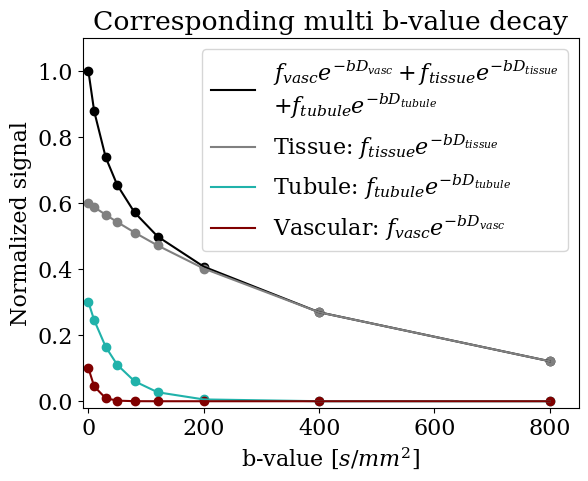

In [40]:
b = np.array([0, 10, 30, 50, 80, 120, 200, 400, 800])

pl.scatter(b, fvasc*np.exp(-b*Dvasc)+ftubule*np.exp(-b*Dtubule)+ftissue*np.exp(-b*Dtissue), color = 'black')
pl.plot(b, fvasc*np.exp(-b*Dvasc)+ftubule*np.exp(-b*Dtubule)+ftissue*np.exp(-b*Dtissue), color = 'black', label = '$f_{vasc}e^{-bD_{vasc}} + f_{tissue}e^{-bD_{tissue}}$\n$+ f_{tubule}e^{-bD_{tubule}}$')

pl.scatter(b, ftissue*np.exp(-b*Dtissue),color = 'grey')
pl.plot(b, ftissue*np.exp(-b*Dtissue), label = 'Tissue: $f_{tissue}e^{-bD_{tissue}}$', color = 'grey')

pl.scatter(b, ftubule*np.exp(-b*Dtubule),color = 'lightseagreen')
pl.plot(b, ftubule*np.exp(-b*Dtubule), label = 'Tubule: $f_{tubule}e^{-bD_{tubule}}$', color = 'lightseagreen')

pl.scatter(b, fvasc*np.exp(-b*Dvasc),color = 'maroon')
pl.plot(b, fvasc*np.exp(-b*Dvasc), label = 'Vascular: $f_{vasc}e^{-bD_{vasc}}$', color = 'maroon')

pl.legend()
pl.title('Corresponding multi b-value decay')
pl.xlabel('b-value [$s/mm^2$]')
pl.ylabel('Normalized signal')
pl.xlim(-10,850)
pl.ylim(-0.02,1.1)
pl.show()

In [41]:
signal=fvasc*np.exp(-b*Dvasc)+ftubule*np.exp(-b*Dtubule)+ftissue*np.exp(-b*Dtissue)

In [42]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/RA_Spectra.xlsx'
Spectra_Data = pd.read_excel(fileloc,sheet_name = 'SpectralPlots') 

def plotmodel(bvals, modelvals):
    return modelvals[0]*np.exp(-bvals*modelvals[4]/1000) + modelvals[1]*np.exp(-bvals*modelvals[5]/1000) + modelvals[2]*np.exp(-bvals*modelvals[6]/1000) + modelvals[3]*np.exp(-bvals*modelvals[7]/1000)
    
    

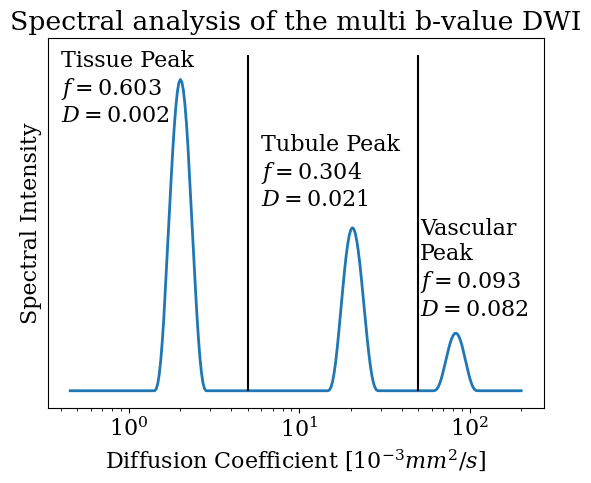

In [43]:
b =[0, 10, 30, 50, 80, 120, 200, 400, 800]

ADCBasisSteps = 300
ADCBasis = np.logspace(np.log10(5), np.log10(2200), ADCBasisSteps)
x = 1/ADCBasis


df = Spectra_Data
pl.plot(x*1000, df.iloc[2,10:], linewidth = 2)
pl.xscale('log', base=10)
pl.vlines(5, 0, .04,color = 'black')
pl.vlines(50, 0, .04, color = 'black')
pl.xlabel('Diffusion Coefficient [$10^{-3} mm^2/s$]')
pl.ylabel('Spectral Intensity')

#pl.text()
pl.yticks([])

pl.text(.4,0.032,'Tissue Peak\n$f=0.603$\n$D=0.002$')
pl.text(6,0.022,'Tubule Peak\n$f=0.304$\n$D=0.021$')
pl.text(51,0.009,'Vascular\nPeak\n$f=0.093$\n$D=0.082$')
pl.title('Spectral analysis of the multi b-value DWI')
pl.show()


In [44]:
# anisotropic and anomalous

In [45]:
matplotlib.rcParams.update({'font.size': 16})
pl.rcParams["font.family"] = "serif"
pl.rcParams["mathtext.fontset"] = "dejavuserif"

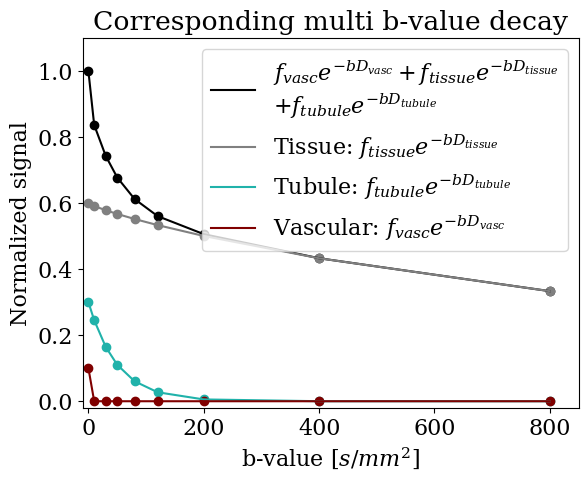

In [46]:
#same diffusion coefficients as above, but with anomalous diffusion

b = np.array([0, 10, 30, 50, 80, 120, 200, 400, 800])

pl.scatter(b, fvasc*np.exp(-(b**2)*Dvasc)+ftubule*np.exp(-(b**1)*Dtubule)+ftissue*np.exp(-(b**.85)*Dtissue), color = 'black')
pl.plot(b, fvasc*np.exp(-(b**2)*Dvasc)+ftubule*np.exp(-(b**1)*Dtubule)+ftissue*np.exp(-(b**.85)*Dtissue), color = 'black', label = '$f_{vasc}e^{-bD_{vasc}} + f_{tissue}e^{-bD_{tissue}}$\n$+ f_{tubule}e^{-bD_{tubule}}$')

pl.scatter(b, ftissue*np.exp(-(b**.85)*Dtissue),color = 'grey')
pl.plot(b, ftissue*np.exp(-(b**.85)*Dtissue), label = 'Tissue: $f_{tissue}e^{-bD_{tissue}}$', color = 'grey')

pl.scatter(b, ftubule*np.exp(-(b**1)*Dtubule),color = 'lightseagreen')
pl.plot(b, ftubule*np.exp(-(b**1)*Dtubule), label = 'Tubule: $f_{tubule}e^{-bD_{tubule}}$', color = 'lightseagreen')

pl.scatter(b, fvasc*np.exp(-(b**2)*Dvasc),color = 'maroon')
pl.plot(b, fvasc*np.exp(-(b**2)*Dvasc), label = 'Vascular: $f_{vasc}e^{-bD_{vasc}}$', color = 'maroon')

pl.legend()
pl.title('Corresponding multi b-value decay')
pl.xlabel('b-value [$s/mm^2$]')
pl.ylabel('Normalized signal')
pl.xlim(-10,850)
pl.ylim(-0.02,1.1)
pl.show()

In [56]:
def triexp_func(b, frac_fast,frac_med,frac_slow,diff_fast,diff_med,diff_slow):
    Data = frac_slow*np.exp(-b*diff_slow)+frac_med*np.exp(-b*diff_med)+frac_fast*np.exp(-b*diff_fast)
    normal = frac_slow+frac_med+frac_fast
    return Data/normal

def anomalous_multicomp(b, fvasc,ftubule,ftissue,Dvasc,Dtubule,Dtissue):# gamma_vasc, gamma_tubule, gamma_tissue):
    Data=fvasc*np.exp(-((b*Dvasc)**2))+ftubule*np.exp(-((b*Dtubule)**1))+ftissue*np.exp(-((b*Dtissue)**0.85))
    normal = fvasc+ftubule+ftissue
    return Data/normal
    
def plotmodel_anomalous(bvals, modelvals):
    normal=modelvals[0]+modelvals[1]+modelvals[2]
    return (modelvals[0]*np.exp(-(bvals*modelvals[3])**2) + modelvals[1]*np.exp(-(bvals*modelvals[4])) + modelvals[2]*np.exp(-(bvals*modelvals[5])**.85))/normal
    
def anomalous_singlecomp(b,fvasc,Dvasc):
    Data=fvasc*np.exp(-(b**2)*Dvasc)
    return Data

def plotmodel_anomalous_singlecomp(bvals, modelvals):
    return modelvals[0]*np.exp(-(bvals**2)*modelvals[1])

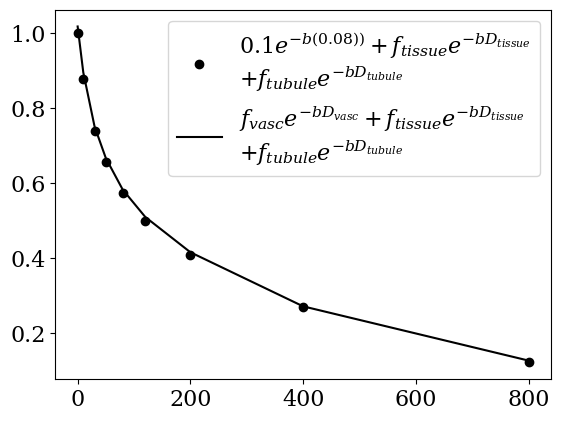

In [74]:
# now doing a fit for different D values for known gamma to match original D.
b = np.array([0, 10, 30, 50, 80, 120, 200, 400, 800])

#pl.scatter(b, fvasc*np.exp(-b*Dvasc)+ftubule*np.exp(-b*Dtubule)+ftissue*np.exp(-b*Dtissue), color = 'black')
simulated_data=fvasc*np.exp(-b*Dvasc)+ftubule*np.exp(-b*Dtubule)+ftissue*np.exp(-b*Dtissue)
pl.scatter(b, fvasc*np.exp(-b*Dvasc)+ftubule*np.exp(-b*Dtubule)+ftissue*np.exp(-b*Dtissue), color = 'black', label = '$0.1e^{-b(0.08))} + f_{tissue}e^{-bD_{tissue}}$\n$+ f_{tubule}e^{-bD_{tubule}}$')
popt, pcov = curve_fit(anomalous_multicomp, b,simulated_data,p0=[.1,.2,.7, 0.1, 0.01, 0.001],bounds=(0, [1,1,1,.1,.1,.1]),maxfev=10000)

pl.plot(b, plotmodel_anomalous(b,popt), color = 'black', label = '$f_{vasc}e^{-bD_{vasc}} + f_{tissue}e^{-bD_{tissue}}$\n$+ f_{tubule}e^{-bD_{tubule}}$')

pl.legend()
pl.show()

In [75]:
Dtissue = .002 #tissue
Dtubule = .0200 #tubules
Dvasc = .0800 #vascular

ftissue = .6
ftubule = .3
fvasc= .1

In [76]:
popt

array([0.05008719, 0.26540354, 0.70200905, 0.1       , 0.02675324,
       0.00235981])

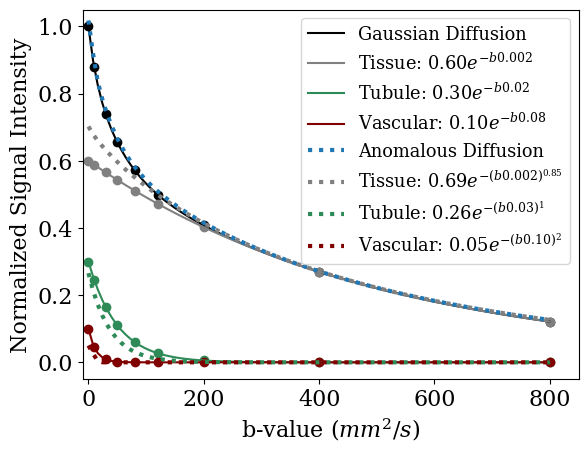

In [79]:
#pl.scatter(b, fvasc*np.exp(-(b**2)*Dvasc)+ftubule*np.exp(-(b**1)*Dtubule)+ftissue*np.exp(-(b**.85)*Dtissue), color = 'black')
#pl.plot(b, fvasc*np.exp(-(b**2)*Dvasc)+ftubule*np.exp(-(b**1)*Dtubule)+ftissue*np.exp(-(b**.85)*Dtissue), color = 'black', label = 'Multi-Compartment Anomalous Diffusion')
b = np.array([0, 10, 30, 50, 80, 120, 200, 400, 800])

b_plot = np.linspace(0,800,100)
pl.scatter(b, fvasc*np.exp(-(b**1)*Dvasc)+ftubule*np.exp(-(b**1)*Dtubule)+ftissue*np.exp(-(b**1)*Dtissue), color = 'black')
pl.plot(b_plot, fvasc*np.exp(-(b_plot**1)*Dvasc)+ftubule*np.exp(-(b_plot**1)*Dtubule)+ftissue*np.exp(-(b_plot**1)*Dtissue), color = 'black', label = 'Gaussian Diffusion')


pl.scatter(b, ftissue*np.exp(-b*Dtissue),color = 'grey')
pl.plot(b_plot, ftissue*np.exp(-b_plot*Dtissue), label = 'Tissue: $0.60e^{-b0.002}$', color = 'grey')

pl.scatter(b, ftubule*np.exp(-b*Dtubule),color = 'seagreen')
pl.plot(b_plot, ftubule*np.exp(-b_plot*Dtubule), label = 'Tubule: $0.30e^{-b0.02}$', color = 'seagreen')

pl.scatter(b, fvasc*np.exp(-b*Dvasc),color = 'maroon')
pl.plot(b_plot, fvasc*np.exp(-b_plot*Dvasc), label = 'Vascular: $0.10e^{-b0.08}$', color = 'maroon')


#pl.scatter(b, plotmodel_anomalous(b,popt), color = 'blue')

pl.plot(b_plot, plotmodel_anomalous(b_plot,popt),linestyle=':', linewidth=3, color = '#1f77b4', label = 'Anomalous Diffusion')
pl.plot(b_plot, popt[2]*np.exp(-(b_plot*popt[5])**0.85),linestyle=':', linewidth=3,color = 'grey',label = 'Tissue: $0.69e^{-(b0.002)^{0.85}}$')#, label = 'Multi-Compartment Adjusted Anomalous Diffusion')
pl.plot(b_plot, popt[1]*np.exp(-(b_plot*popt[4])**1),linestyle=':', linewidth=3,color = 'seagreen',label = 'Tubule: $0.26e^{-(b0.03)^1}$')#, label = 'Multi-Compartment Adjusted Anomalous Diffusion')
pl.plot(b_plot, popt[0]*np.exp(-(b_plot*popt[3])**2),linestyle=':', linewidth=3,color = 'maroon',label = 'Vascular: $0.05e^{-(b0.10)^2}$')#, label = 'Multi-Compartment Adjusted Anomalous Diffusion')


pl.legend(loc=1, prop={'size': 12.8},ncol=1)
pl.xlim(-10,850)
pl.ylim(-0.05,1.05)
pl.xlabel('b-value ($mm^2/s$)')
pl.ylabel('Normalized Signal Intensity')
pl.show()

In [ ]:
b = np.array([0, 10, 30, 50, 80, 120, 200, 400, 800])

plotmodel_anomalous(b,popt)

In [ ]:
signal=fvasc*np.exp(-b*Dvasc)+ftubule*np.exp(-b*Dtubule)+ftissue*np.exp(-b*Dtissue)
signal

In [ ]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/RA_Spectra.xlsx'
Spectra_Data = pd.read_excel(fileloc,sheet_name = 'SpectralPlots') 

def plotmodel(bvals, modelvals):
    return modelvals[0]*np.exp(-bvals*modelvals[4]/1000) + modelvals[1]*np.exp(-bvals*modelvals[5]/1000) + modelvals[2]*np.exp(-bvals*modelvals[6]/1000) + modelvals[3]*np.exp(-bvals*modelvals[7]/1000)
    
    

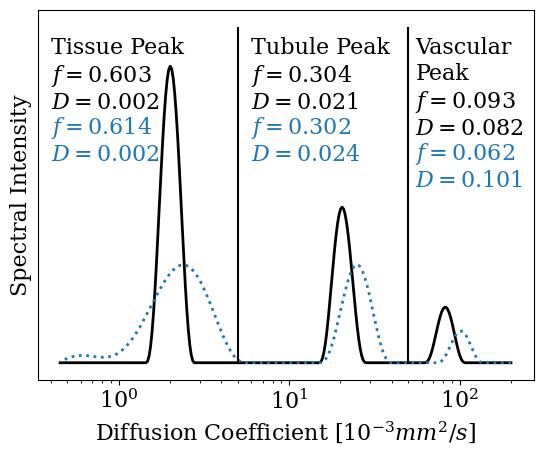

In [80]:
b =[0, 10, 30, 50, 80, 120, 200, 400, 800]

ADCBasisSteps = 300
ADCBasis = np.logspace(np.log10(5), np.log10(2200), ADCBasisSteps)
x = 1/ADCBasis


df = Spectra_Data
pl.plot(x*1000, df.iloc[13,10:], linewidth = 2,color='black')
pl.plot(x*1000, df.iloc[11,10:], linewidth = 2,linestyle=':',color='#1f77b4')

pl.xscale('log', base=10)
pl.vlines(5, 0, .045,color = 'black')
pl.vlines(50, 0, .045, color = 'black')
pl.xlabel('Diffusion Coefficient [$10^{-3} mm^2/s$]')
pl.ylabel('Spectral Intensity')

#pl.text()
pl.yticks([])



pl.text(.4,0.034,'Tissue Peak\n$f=0.603$\n$D=0.002$',color='black')
pl.text(6,0.034,'Tubule Peak\n$f=0.304$\n$D=0.021$',color='black')
pl.text(55,0.0305,'Vascular\nPeak\n$f=0.093$\n$D=0.082$',color='black')

pl.text(.4,0.027,'$f=0.614$\n$D=0.002$',color='#1f77b4')
pl.text(6,0.027,'$f=0.302$\n$D=0.024$',color='#1f77b4')
pl.text(55,0.0235,'$f=0.062$\n$D=0.101$',color='#1f77b4')

#pl.title('Spectral analysis of the multi b-value DWI')
pl.show()
